We study the convergence of the DMRG1 code varying $\chi$

In [1]:
import dmrg1 as dmrg1
import MPO_class as MPO

import matplotlib.pyplot as plt
import numpy as np

plt.rc('text',usetex=True)

In [4]:
# DMRG parameters
nsteps = np.arange(6)
chi_space = np.array([2**x for x in range(3,8)])
stdchi = np.zeros((chi_space.size,nsteps.size))

# Model parameters
L   = 128
h   = 1.
H   = MPO.IsingMPO(L,1.)
engine = dmrg1.DMRG1(H)

for i, chi in enumerate(chi_space):
    engine.initialize(chi)
    for n in nsteps:
        engine.dmrg_step()
        stdchi[i,n] = engine.check_convergence().real

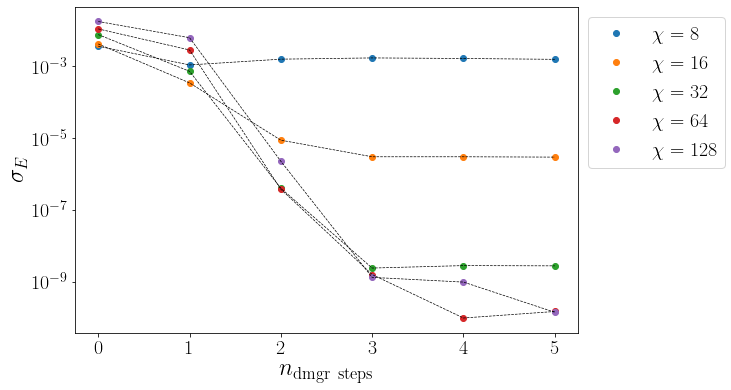

In [38]:
plt.figure(figsize=(9,6))
for i,chi in enumerate(chi_space):
    plt.plot(nsteps,np.abs(stdchi[i,:]).T,'o', label=r"$\chi=%d$"%(chi))
plt.plot(nsteps,np.abs(stdchi).T,'--k',linewidth=0.7)

plt.ylabel(r"$\sigma_E$", fontsize=24)
plt.xlabel(r"$n_\mathrm{dmgr\ steps}$",fontsize=24)
plt.legend(fontsize=20,bbox_to_anchor=[1, 1])
plt.tick_params(labelsize=20)
plt.yscale('log')